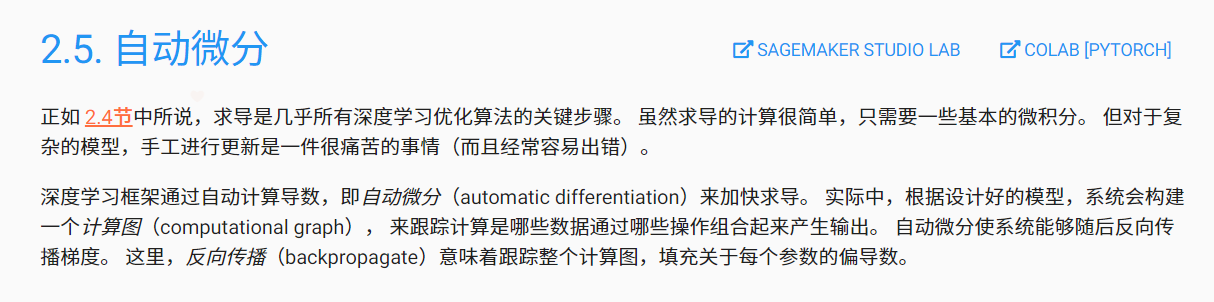

# 1. 一个简单的例子

作为一个演示例子，假设我们想对函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于列向量$\mathbf{x}$求导。 首先，我们创建变量x并为其分配一个初始值。

In [1]:
import torch

x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

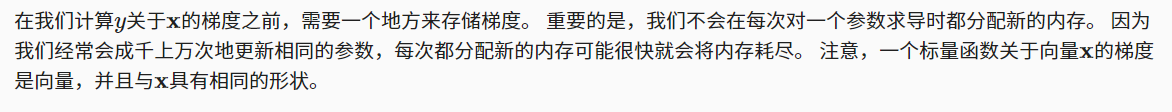

In [2]:
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad  # 默认值是None

现在计算$y$。

In [3]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

x是一个长度为4的向量，计算x和x的点积，得到了我们赋值给y的标量输出。 接下来，通过调用反向传播函数来自动计算y关于x每个分量的梯度，并打印这些梯度。

In [4]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

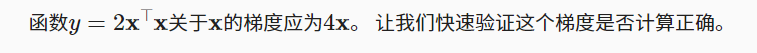

In [5]:
x.grad == 4 * x

tensor([True, True, True, True])

现在计算x的另一个函数

In [6]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

# 2. 非标量变量的反向传播

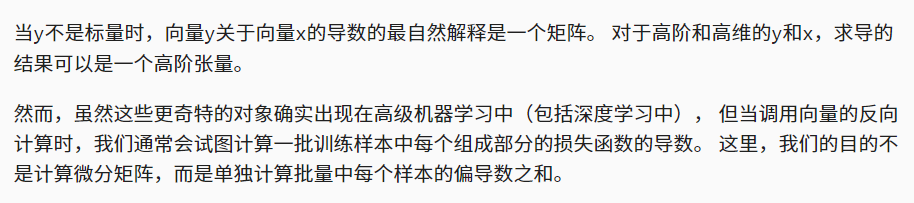

In [7]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

# 3. 分离计算

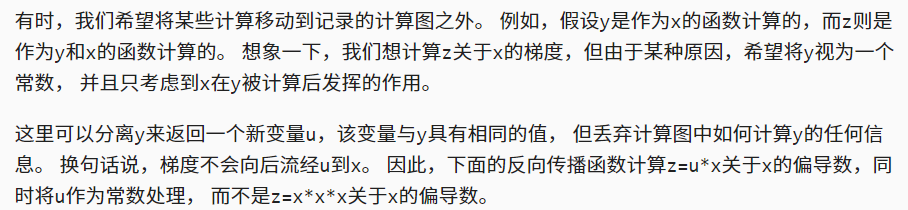

In [8]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

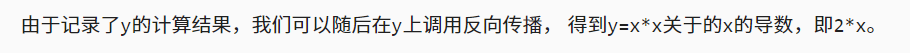

In [9]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

# 4. Python控制流的梯度计算

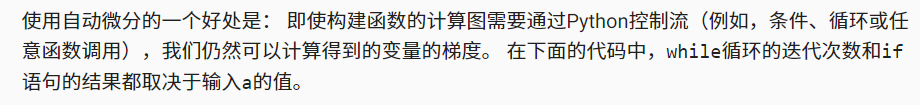

In [10]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

让我们计算梯度。

In [11]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

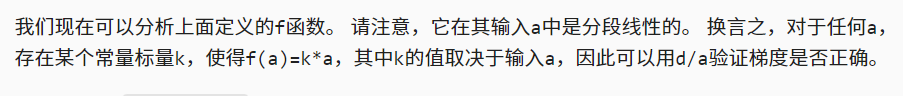

In [12]:
a.grad == d / a

tensor(True)

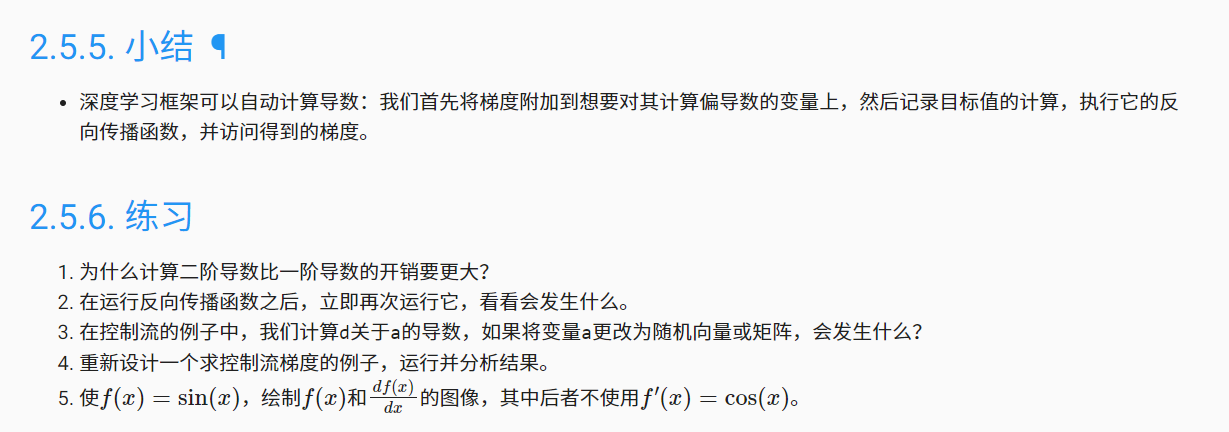